In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [2]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
tf.enable_eager_execution()

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


(28, 28)


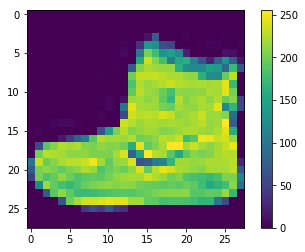

In [6]:
plt.figure()
plt.imshow(train_images[0])

print(train_images[0].shape)
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images, test_images = train_images.astype(np.float32)/255. , test_images.astype(np.float32)/255.
train_labels, test_labels = keras.utils.to_categorical(train_labels), keras.utils.to_categorical(test_labels)

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [0]:
train_images, test_images = np.expand_dims(train_images, -1), np.expand_dims(test_images, -1)

In [10]:
print(train_images.shape)

(60000, 28, 28, 1)


In [0]:
def create_encoder():
  inputs = keras.layers.Input((28, 28, 1))
  
  net = keras.layers.Conv2D(32, kernel_size=3, strides=2, activation = tf.nn.relu, padding='same')(inputs)
  net = keras.layers.Conv2D(64, kernel_size=3, strides=1, activation = tf.nn.relu, padding='same')(net)
  net = keras.layers.MaxPooling2D(padding='same', pool_size=3, strides=2)(net)
  net = keras.layers.BatchNormalization()(net)
  
  net = keras.layers.Flatten()(net)
  outputs = keras.layers.Dense(256, activation = tf.nn.sigmoid)(net)
  
  return keras.Model(inputs = inputs, outputs = outputs)

In [0]:
# def create_encoder():
#   inputs = keras.layers.Input((784, ))
  
#   net = keras.layers.Dense(512, activation = tf.nn.leaky_relu)(inputs)
#   net = keras.layers.Dropout(0.4)(net)
#   outputs = keras.layers.Dense(256, activation = tf.nn.leaky_relu)(net)
  
#   return keras.Model(inputs = inputs, outputs = outputs)

In [13]:
encoder = create_encoder()

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 7, 7, 64)          256       
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               803072    
Total para

In [0]:
def create_decoder():
  inputs = keras.layers.Input((256, ))
  
  net = keras.layers.Dense(3136)(inputs)
  net = keras.layers.Reshape((7, 7, 64))(net)
#   net = keras.layers.UpSampling2D(size=2)(net)
  net = keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding='same')(net)
  outputs = keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding='same')(net)
  
  return keras.Model(inputs = inputs, outputs = outputs)

In [0]:
# def create_decoder():
#   inputs = keras.layers.Input((256, ))
  
#   net = keras.layers.Dropout(0.3)(inputs)
#   net = keras.layers.Dense(512)(net)
#   outputs = keras.layers.Dense(784)(net)
  
#   return keras.Model(inputs = inputs, outputs = outputs)

In [0]:
decoder = create_decoder()

In [18]:
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              805952    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 824,705
Trainable params: 824,705
Non-trainable params: 0
_________________________________________________________________


In [0]:
def loss_fn(encoder, decoder, images):
  loss = tf.reduce_mean(tf.pow(images - decoder(encoder(images)), 2))
  return loss

In [0]:
# def loss_fn(encoder, decoder, inputs):
#   loss = tf.reduce_mean(tf.pow(inputs - decoder(encoder(inputs)), 2))
#   return loss

In [0]:
def grad(encoder, decoder, images):
  with tf.GradientTape() as tp_en, tf.GradientTape() as tp_de:
    loss = loss_fn(encoder, decoder, images)
  
  return tp_de.gradient(loss, decoder.trainable_variables), tp_en.gradient(loss, encoder.trainable_variables)

In [0]:
# def grad(encoder, decoder, inputs):
#   with tf.GradientTape() as tp_en, tf.GradientTape() as tp_de:
#     loss = loss_fn(encoder, decoder, inputs)
  
#   return tp_de.gradient(loss, decoder.trainable_variables), tp_en.gradient(loss, encoder.trainable_variables)

In [0]:
optimizer = tf.train.AdamOptimizer(1e-3)

In [0]:
# train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(100000).batch(256)
# test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(256)

In [0]:
import random

In [0]:
# for e in range(epochs):
#     print('Epoch', e)
#     batches = 0
#     for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=32):
#         model.fit(x_batch, y_batch)
#         batches += 1
#         if batches >= len(x_train) / 32:
#             # we need to break the loop by hand because
#             # the generator loops indefinitely
#             break

In [0]:
EPOCHS = 10

print("Learning started")

for epoch in range(EPOCHS):
  avg_loss = 0.
  avg_train_acc = 0.
  avg_test_acc = 0.
  train_step = 0
  test_step = 0

  print("Learning on progresses")
  for images, labels in datagen.flow(train_images, train_labels, batch_size=128):
#     inputs = np.reshape(images, (-1, 784))
    de_grads, en_grads = grad(encoder, decoder, images)
#     print(grads)
    optimizer.apply_gradients(zip(de_grads, decoder.trainable_variables))
    optimizer.apply_gradients(zip(en_grads, encoder.trainable_variables))
    
    loss = loss_fn(encoder, decoder, images)
    avg_loss = avg_loss + loss
    train_step += 1
    
  avg_loss = avg_loss / train_step
  
  sample_size = 10
  sample_from = random.randint(0, 9000)
#   sample_inputs = np.reshape(test_images[:sample_size], (-1, 784))
  samples = decoder(encoder(test_images[sample_from: sample_from + sample_size]))
  
  fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))
  for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    
    ax[0][i].imshow(np.reshape(test_images[sample_from + i], (28, 28)), cmap = plt.cm.binary)
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)), cmap = plt.cm.binary)
  plt.show()

Learning started
Learning on progresses


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [0]:
from scipy import ndimage
import random

def data_augmentation(images, labels):
  aug_images = [], aug_labels = []
  
  for x, y in zip(images, labels):
    aug_images.append(x)
    aug_labels.append(y)
    
    bg_value = np.median(x)
    
    for _ in range(4):
      angle = np.random.randint(-15, 15, 1)
      rot_img = ndimage.rotate(x, angle, reshape=False, cval=bg_value)
      
      shift = np.random.randint(-2, 2, 2)
      shift_img = ndimage.shift(rot_img, shift, cval=bg_value)
      
      aug_images.append(shift_img)
      aug_labels.append(y)
  aug_images = np.array(aug_images)
  aug_labels = np.array(aug_labels)
  
  return aug_images, aug_labels

In [0]:
_